In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ast

In [20]:
df = pd.read_csv("dual_solver_3.csv", sep="\t")
df["iterations"]=df.iterations.apply(lambda x: ast.literal_eval(str(x)))
df["solver_time"]=df.solver_time.apply(lambda x: ast.literal_eval(str(x)))
df

,i,k,t,iterations,solver_time
0,1,0,5,"[195, 197, 196]","[0.5030972957611084, 0.5239882469177246, 0.444..."
1,1,0,4,"[16, 5, 16]","[0.02931952476501465, 0.033158063888549805, 0...."
2,1,0,3,"[5, 5, 5]","[0.033113956451416016, 0.01004338264465332, 0...."
3,1,0,2,"[3, 1962, 1247]","[0.007997989654541016, 4.409130096435547, 4.17..."
4,1,0,1,"[2, 2, 2]","[0.0, 0.0, 0.0]"
...,...,...,...,...,...
70,15,0,5,"[15, 15, 15]","[0.04380393028259277, 0.03614354133605957, 0.0..."
71,15,0,4,"[76, 75, 76]","[15.84586238861084, 19.210590362548828, 16.216..."
72,15,0,3,"[75, 75, 75]","[49.71967887878418, 87.61570286750793, 116.938..."
73,15,0,2,"[30, 59, 40]","[18.24764084815979, 35.6603000164032, 47.61215..."


In [21]:
n_iterations = df["i"].nunique()
n_samples = df["k"].nunique()
n_stages = df["t"].nunique()
n_realizations = len(df.iterations.iloc[0])

print(f"Iterations: {n_iterations}")
print(f"Samples: {n_samples}")
print(f"Stages: {n_stages}")
print(f"Realizations: {n_realizations}")

Iterations: 15
Samples: 1
Stages: 5
Realizations: 3


In [22]:
df

,i,k,t,iterations,solver_time
0,1,0,5,"[195, 197, 196]","[0.5030972957611084, 0.5239882469177246, 0.444..."
1,1,0,4,"[16, 5, 16]","[0.02931952476501465, 0.033158063888549805, 0...."
2,1,0,3,"[5, 5, 5]","[0.033113956451416016, 0.01004338264465332, 0...."
3,1,0,2,"[3, 1962, 1247]","[0.007997989654541016, 4.409130096435547, 4.17..."
4,1,0,1,"[2, 2, 2]","[0.0, 0.0, 0.0]"
...,...,...,...,...,...
70,15,0,5,"[15, 15, 15]","[0.04380393028259277, 0.03614354133605957, 0.0..."
71,15,0,4,"[76, 75, 76]","[15.84586238861084, 19.210590362548828, 16.216..."
72,15,0,3,"[75, 75, 75]","[49.71967887878418, 87.61570286750793, 116.938..."
73,15,0,2,"[30, 59, 40]","[18.24764084815979, 35.6603000164032, 47.61215..."


In [23]:
solver_times = np.array(df.solver_time.values.tolist())
solver_iterations = np.array(df.iterations.tolist())

In [24]:
dual_evaluation_times = np.divide(solver_times, solver_iterations)
dual_evaluation_times

array([[2.57998613e-03, 2.65983882e-03, 2.26579150e-03],
       [1.83247030e-03, 6.63161278e-03, 2.57295370e-03],
       [6.62279129e-03, 2.00867653e-03, 3.79967690e-03],
       [2.66599655e-03, 2.24726305e-03, 3.35087658e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34935602e-03, 2.20118611e-03, 2.46212641e-03],
       [2.76094005e-02, 3.02008063e-02, 2.87139217e-02],
       [2.48470320e-02, 2.46342174e-02, 2.07140366e-02],
       [1.94875021e-02, 2.05542533e-02, 2.55857637e-02],
       [2.52635379e-02, 2.48283917e-02, 2.17288681e-02],
       [4.85076785e-03, 4.90280986e-03, 4.43128580e-03],
       [6.55440127e-02, 7.52728158e-02, 6.34145099e-02],
       [5.14302370e-02, 5.18728928e-02, 6.09970671e-02],
       [3.54961510e-02, 3.14598009e-02, 3.13911429e-02],
       [2.44180503e-02, 4.27357197e-02, 4.10786629e-02],
       [1.98279023e-03, 2.23117471e-03, 2.00354611e-03],
       [8.16893127e-02, 7.71391551e-02, 8.28290566e-02],
       [7.72263596e-02, 6.37655

In [25]:
avg_evaluation_times = np.mean(dual_evaluation_times, axis=1).tolist()
avg_evaluation_times

[0.0025018721509000126,
 0.0036790122588475547,
 0.004143714904785156,
 0.0027547120580156425,
 0.0,
 0.0023375561800487257,
 0.028841376154499627,
 0.023398428665763,
 0.02187583970671921,
 0.023940265909071928,
 0.00472828783554971,
 0.06807711280365253,
 0.054766732306437665,
 0.03278236492870452,
 0.036077477608197996,
 0.0020725036844795133,
 0.08055250809357332,
 0.07349155918474215,
 0.10309647061885933,
 0.045410466266145894,
 0.002222299575805664,
 0.0923207848454123,
 0.14031094984776202,
 0.11647884854728256,
 0.06318448352433155,
 0.0023434914293743317,
 0.12647918669077066,
 0.18322914838790894,
 0.0798011535824038,
 0.0678565061237593,
 0.0016405128297351656,
 0.1497293894107525,
 0.1989798069000244,
 0.09101838980146561,
 0.07465052793943451,
 0.0018439335866017384,
 0.10688065909373079,
 0.29020268721475656,
 0.12890794101454667,
 0.08321437347279265,
 0.0019160395576840355,
 0.1444511980186274,
 0.2820562402407328,
 0.1512932210267678,
 0.09445262545401455,
 0.00260012

In [26]:
eval_times_per_iteration = []
i=0
while i < n_iterations*n_stages:
    eval_times_per_iteration.append(avg_evaluation_times[i:i+n_stages])
    i += n_stages


iterations = [i+1 for i in range(n_iterations)]

eval_times_per_iteration = np.array(eval_times_per_iteration)


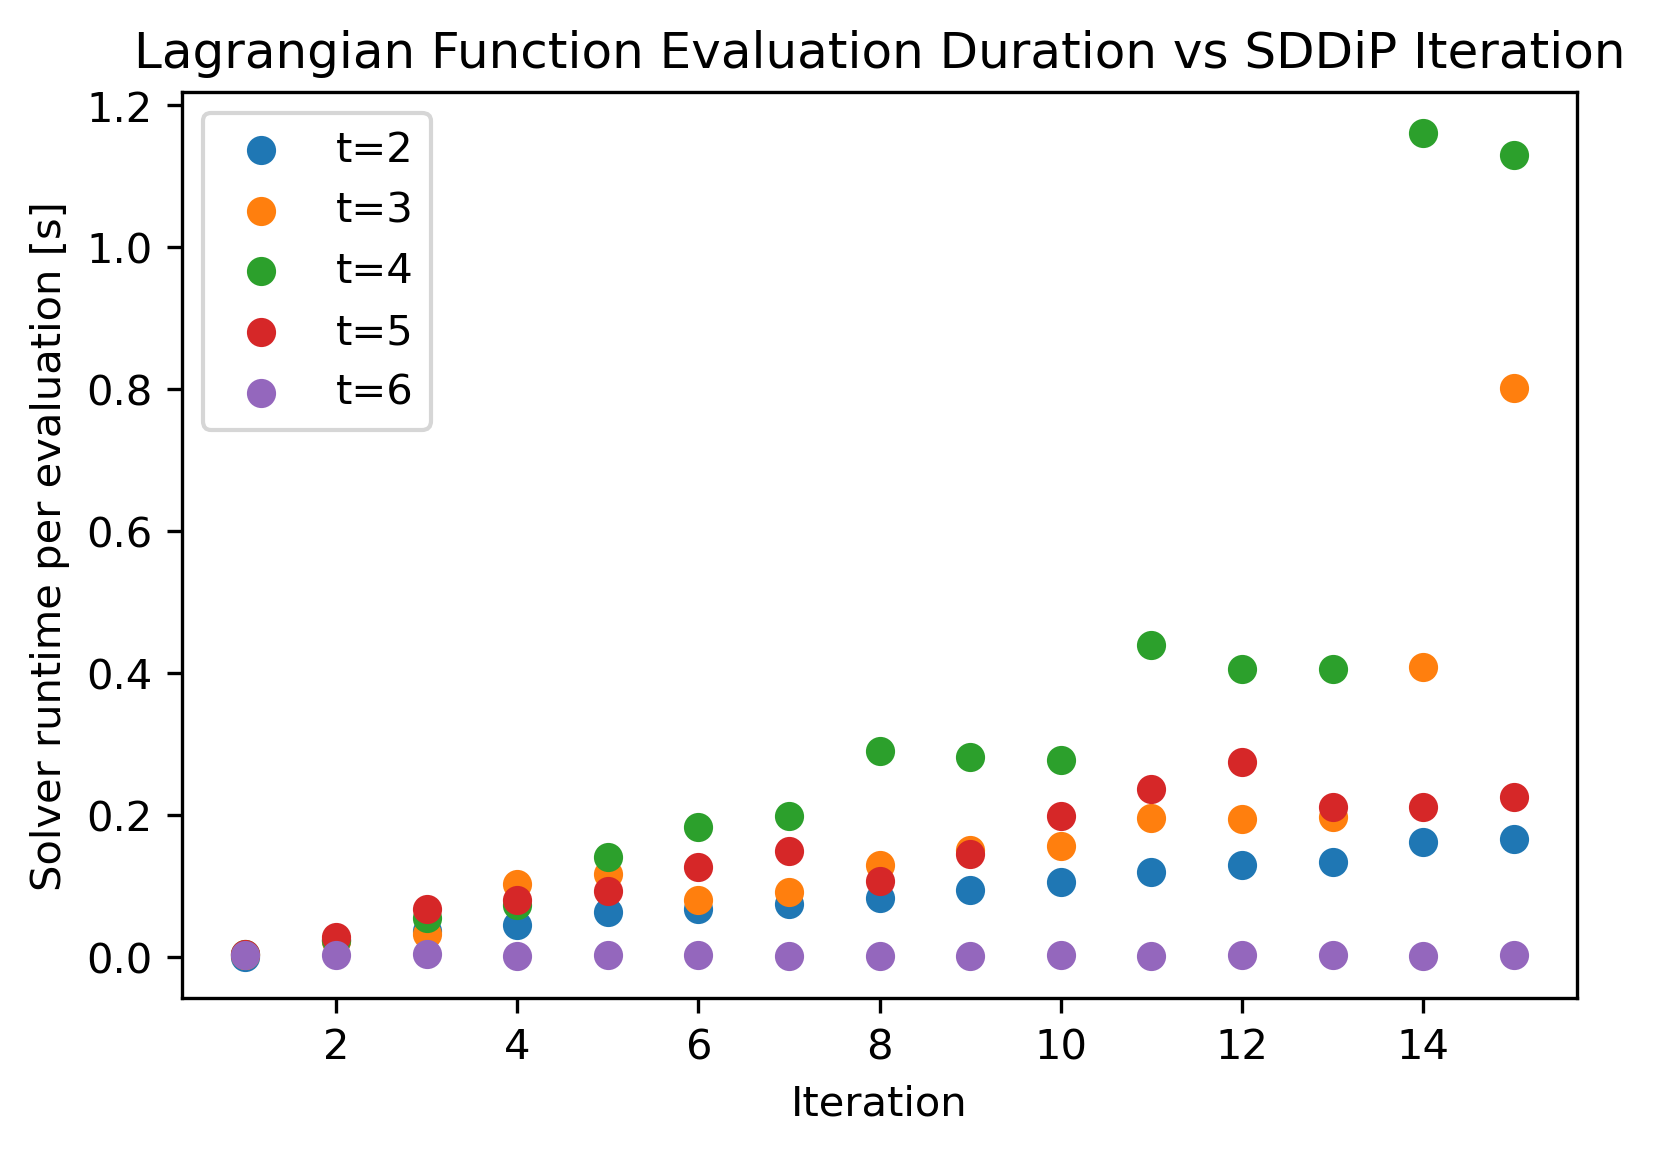

In [27]:
plt.figure(dpi= 300, facecolor='w', edgecolor='k')

for t in range(n_stages):
    plt.scatter(iterations, eval_times_per_iteration[:,n_stages-(t+1)], label=f"t={t+2}")

plt.gca().set(xlabel="Iteration", ylabel="Solver runtime per evaluation [s]")
plt.title("Lagrangian Function Evaluation Duration vs SDDiP Iteration")
plt.legend()
plt.show()